<a href="https://colab.research.google.com/github/imsld/MID_TPs/blob/main/3_TP_MLP_for_diabete_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP n°3: Learning machine model for PIMA Diabetes  (version draft)** 

**Authors:** SMAHI Mohammed Ismail / Benledghem Rafika

**Year:** 2022/2023

**Unit:** Learning machine

**Promotion:** Modèles intelligents et décision MID

**Department:** Computer Sciences (University of Tlemcen)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
%%capture
#if you work on Colab follow this steps (Otherwis go to the next cell):

#0 : make a necessary importation
import os

#1 : upload the dataset file 'pima.csv' on the your google drive
file_name = "pima.csv"

#2 : get the path where the dataset is uploded (make any necessary changes)
notebookpath="/content/drive/MyDrive/Colab Notebooks/"

#3 : mount your Google Drive files by running the following code
from google.colab import drive
drive.mount("/content/drive/")

#4 : check if the dataset exists in the Drive
if not os.path.isfile(os.path.join(notebookpath, file_name)):
    raise ValueError(f"file '{file_name}' not found in path '{notebookpath}'.")

#5 : set the dataset path
dataset_path = notebookpath + file_name

In [ ]:
%%capture
#if you work on anaconda follow this steps (Otherwis go to the previous cell):

#1 : put the dataset file 'pima.csv' on the specific folder
file_name = "pima.csv"

#2 : get the path where the dataset is stored (make any necessary changes)
notebookpath="C:/Users/anaconda/notebook/"

#5 : set tthe dataset path
dataset_path = notebookpath + file_name

#another option (you can try this code)
'''  
  import io
  from google.colab import files
  uploaded = files.upload()
  dataset_path = io.BytesIO(uploaded['pima.csv'])
'''

In [ ]:
#Load the dataset and set the header names

# P  : Number of times pregnant
# G  : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BP : Diastolic blood pressure (mm Hg)
# ST : Triceps skin fold thickness (mm)
# I  : 2-Hour serum insulin (mu U/ml)
# BMI: Body Mass Index (weight in kg/(height in m)^2)
# DPF: Diabetes pedigree function
# AGE: Age (years)
# Outcome (0 or 1)

columns_names = ['P','G','BP','ST','I','BMI','DPF','AGE','Outcome']
dataset = pd.read_csv(dataset_path, sep=',', header=None, names=columns_names)
dataset.head()

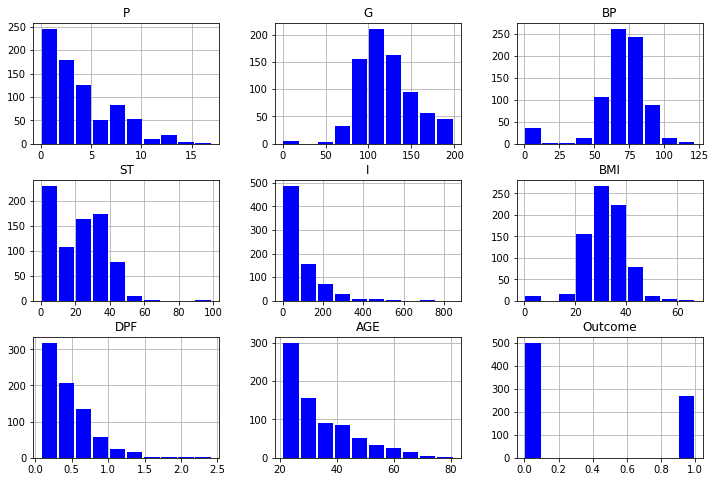

In [ ]:
#plot a histogram representation to visualize the distribution of data in our dataset
#for more details on creating histograms with Pandas, go to: https://mode.com/example-gallery/python_histogram/
dataset.hist(figsize=(12,8), color='blue', zorder=2, rwidth=0.9)
plt.show()

In [ ]:
#generate descriptive statistics 
dataset.describe()

,P,G,BP,ST,I,BMI,DPF,AGE,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#get number of 0 values for each feature (todo student) 
for col in dataset.columns:
    zero_values_rows = dataset.loc[dataset[col]==0].shape[0]
    print(col+": "+str(zero_values_rows))

#get number of missing values for each feature and set it's at 0 (todo student)
for col in dataset.columns:
    missing_values_rows = dataset[col].isna().sum() 
    print(col+": "+str(missing_values_rows))
    if (missing_values_rows == 0):
      dataset[col].fillna(0)



In [ ]:
# Preprocessing data of our dataset by scaling all features.
# we want to put our data on the same scale (rescaled data in the range of 0 and 1).
# For more information see: https://medium.com/coderbyte/how-to-normalize-the-data-in-python-18a1cbc47ec1

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data = dataset.drop(['Outcome'], axis='columns')
data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(data, columns=columns_names[0:-1])
scaled_data.head()

,P,G,BP,ST,I,BMI,DPF,AGE
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [ ]:
#split the dataset 
#80% for train and 20% for test

np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, dataset.Outcome, test_size=.2, random_state=0)
X_train

In [ ]:
def initialize_parameters_deep(layer_dims):
  np.random.seed(3)
  parameters = {}
  L = len(layer_dims) # number of layers in the network

  for l in range(1, L): 
      parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
      parameters['b' + str(l)] = np.random.randn(layer_dims[l], 1) * 0.01
     
  return parameters

In [ ]:
def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  return A

def relu(Z):
  A = np.maximum(0,Z)
  return A

def activation_forward(A_prev, W, b, activation):
  
  Z = np.dot(W,A_prev) + b
  A = Z

  if activation == "sigmoid":
    A = sigmoid(Z)
  
  elif activation == "relu":
    A = relu(Z)

  linear_cache = (A_prev, W, b)
  activation_cache = Z 
  cache = (linear_cache, activation_cache)

  return A, cache

In [ ]:
def model_forward(X, parameters, activations):
  caches = [] #we need it in backward propagation 
  A = X
  L = len(parameters) // 2 # number of layers in the neural network  

  for l in range(1, L):
      A_prev = A 
      A, cache = activation_forward(A_prev, parameters['W' + str(l)], 
                                            parameters['b' + str(l)], 
                                            activation=activations[l-1])
      caches.append(cache)

  

  AL, cache = activation_forward(A, parameters['W' + str(L)], 
                                    parameters['b' + str(L)], 
                                    activation=activations[L-1])
  caches.append(cache)
          
  return AL, caches

# Cost function

Implement the cross-entropy cost, using the following formula:

$-\frac{1}{m}\sum\limits_{i=0}^{m}(y^{(i)}\log(\hat{y}^{(i)})+ (1-y^{(i)})\log(1-\hat{y}^{(i)}))$

In [ ]:
#Implement the cross-entropy cost, using the following formula: 
def compute_cost(AL, Y):
  m = Y.shape[1]
  #cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
  #cost = np.squeeze(cost)  # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
  cost = (-1/m) * (np.sum(Y* np.log(AL) + (1-Y) * np.log(1-AL)))
  return cost

# calculate the derivative
$\frac{\delta\ \text{Cost}}{\delta \hat{y}}=$

In [ ]:
def relu_backward(dA, cache):    
  
  Z = cache
  dZ = np.array(dA, copy=True) # just converting dz to a correct object.

  # When z <= 0, you should set dz to 0 as well. 
  dZ[Z <= 0] = 0

  return dZ

def sigmoid_backward(dA, cache):
  Z = cache
  s = 1/(1+np.exp(-Z))
  dZ = dA * s * (1-s)
  
  return dZ


def linear_backward(dZ, cache):
  # Here cache is "linear_cache" containing (A_prev, W, b) coming from the forward propagation in the current layer

  A_prev, W, b = cache
  m = A_prev.shape[1]

  dW = (1/m) * np.dot(dZ, A_prev.T)
  db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
  dA_prev = np.dot(W.T,dZ)

  return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):

  linear_cache, activation_cache = cache

  dZ = dA
    
  if activation == 'relu':
      dZ = relu_backward(dA, activation_cache)
      
  elif activation == 'sigmoid':
      dZ = sigmoid_backward(dA, activation_cache)
  
  
  dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
  return dA_prev, dW, db


In [ ]:
#Backward propagation
def L_model_backward(AL, Y, caches, activations):
  grads = {}
  L = len(caches)
  m = AL.shape[1]
  Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

  current_cache = caches[L-1] # Last Layer
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = activations[L-1])


  # Loop from l=L-2 to l=0
  for l in reversed(range(L-1)):
      current_cache = caches[l]
      dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = activations[l-1])
      grads["dA" + str(l)] = dA_prev_temp
      grads["dW" + str(l + 1)] = dW_temp
      grads["db" + str(l + 1)] = db_temp

  return grads

# Update Parameters

In [ ]:
#Update Parameters
def update_parameters(parameters, grads, learning_rate):

  L = len(parameters) // 2

  for l in range(L):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
  return parameters

In [ ]:
def train_process(X, Y, parameters, learning_rate, activations, epoch=1):
  loss_all = []
  for t in range(epoch):
      AL, caches = model_forward(X, parameters, activations)
      loss = compute_cost(AL, Y)
      loss_all.append(loss)
      grads = L_model_backward(AL, Y, caches, activations)
      parameters = update_parameters(parameters, grads, learning_rate)
  return loss_all

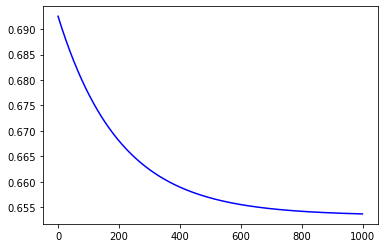

In [ ]:
#Test example: initialize model with:
# 8 features for input layer, 
# 4 nerons for the first hiden layer
# 3 nerons for the second hiden layer
# 1 neron for the output layer

dim           = [8,12,8,1]
activations   = ['relu','relu','sigmoid']
learning_rate = 0.01
epoch         = 1000

X = np.asarray(X_train)
X = np.transpose(X)

Y = np.asarray(y_train)
Y = Y.reshape(1, len(Y))

parameters = initialize_parameters_deep(dim)

loss_all = train_process(X, Y, parameters, learning_rate, activations, epoch)

#Convert the array into a 1D array
loss_all

fig, ax = plt.subplots()
ax.plot(loss_all, '-b')
plt.show()


In [ ]:
def predict(X, Y, parameters):
  
  output, caches = model_forward(X, parameters, activations)
  loss = compute_cost(output, Y)
  
  return output, loss

In [ ]:
X = np.asarray(X_train)
X_train = np.transpose(X)

Y = np.asarray(y_train)
Y_train = Y.reshape((1, len(Y)))

X = np.asarray(X_test)
X_test = np.transpose(X)

Y = np.asarray(y_test)
Y_test = Y.reshape((1, len(Y)))

output, loss = predict(X_train, Y_train, parameters)
print('train loss : ', loss)

output, loss = predict(X_test, Y_test, parameters)
print('test loss : ', loss)

train loss :  0.6537115591886917
test loss :  0.6251266100683284


# With Keras now !!!

In [ ]:
from keras.layers import Dense
from keras.models import Sequential



model = Sequential()


#first hidden layer
model.add(Dense(units=12,activation='relu',input_dim=8))
#second hidden layer
model.add(Dense(units=8,activation='relu'))
# Output layer
model.add(Dense(units=1,activation='sigmoid'))
# Compile the model
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy']) #metrics=['binary_crossentropy','mae'] 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%capture
# Training for 200 epochs
history = model.fit(X_train,y_train,epochs=500)

In [ ]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7948
Training Accuracy: 79.48%

5/5 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8117
Testing Accuracy: 81.17%



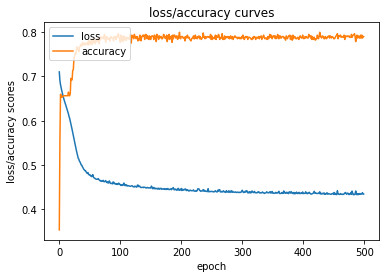

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('loss/accuracy curves')
plt.ylabel('loss/accuracy scores')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()